###### **Description**
##### **Background and Context**
You are a Data Scientist for a tourism company named "Visit with us." The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.

A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

However, the marketing cost was quite high because customers were contacted at random without looking at the available information.

The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance, or kick-start a healthy lifestyle, and support or increase one's sense of well-being.

However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

You, as a Data Scientist at "Visit with us" travel company, have to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

**Objective**

To predict which customer is more likely to purchase the newly introduced travel package.

**Data Dictionary**

**Customer details:**
1.	**CustomerID**:  Unique customer ID
2.	**ProdTaken**:  Product taken flag
3.	**Age**:  Age of customer
4.	**TypeofContact**:  How customer was contacted (Company Invited or Self Inquiry)
5.	**CityTier**:  City tier
6.	**Occupation**:  Occupation of customer
7.	**Gender**:  Gender of customer
8.	**NumberOfPersonVisited**:  Total number of person came with customer
9.	**PreferredPropertyStar**:  Preferred hotel property rating by customer
10.	**MaritalStatus**:  Marital status of customer
11.	**NumberOfTrips**:  Average number of the trip in a year by customer
12.	**Passport**:  The customer has passport or not
13.	**OwnCar**:  Customers owns a car flag
14.	**NumberOfChildrenVisited**:  Total number of children with age less than 5 visit with customer
15.	**Designation**:  Designation of the customer in the current organization
16.	**MonthlyIncome**:  Gross monthly income of the customer

**Customer interaction data:**

1.	**PitchSatisfactionScore**:  Sales pitch satisfactory score
2.	**ProductPitched**:  Product pitched by a salesperson
3.	**NumberOfFollowups**:  Total number of follow up has been done by sales person after sales pitch
4.	**DurationOfPitch**:  Duration of the pitch by a salesman to customer

**Best Practices for Notebook:** 
•	The notebook should be well-documented, with inline comments explaining the functionality of code and markdown cells containing comments on the observations and insights.
•	The notebook should be run from start to finish in a sequential manner before submission.
•	It is preferable to remove all warnings and errors before submission.
•	The notebook should be submitted as an HTML file (.html) and as a notebook file (.ipynb)

**Submission Guidelines:**
1.	There are two parts to the submission:  
    1.	A well commented Jupyter notebook [format - .ipynb]
    2.	File converted to HTML format 
2.	Any assignment found copied/ plagiarized with other groups will not be graded and awarded zero marks
3.	Please ensure timely submission as any submission post-deadline will not be accepted for evaluation
4.	Submission will not be evaluated if, 
    1.	it is submitted post-deadline, or,
    2.	more than 2 files are submitted
Happy Learning!!

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy
import statistics
import warnings
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [2]:
# other global options
np.set_printoptions(suppress = True)  # To avoid unnecessary engineering notation use later.
warnings.filterwarnings("ignore")

In [3]:
#import dataset
input_data = "./Tourism.xlsx"
my_sheet = "Tourism"
df = pd.read_excel(input_data, sheet_name = my_sheet)
df.head().style.hide_index()

CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
200000,1,41.000000,Self Enquiry,3,6.000000,Salaried,Female,3,3.000000,Deluxe,3.000000,Single,1.000000,1,2,1,0.000000,Manager,20993.000000
200001,0,49.000000,Company Invited,1,14.000000,Salaried,Male,3,4.000000,Deluxe,4.000000,Divorced,2.000000,0,3,1,2.000000,Manager,20130.000000
200002,1,37.000000,Self Enquiry,1,8.000000,Free Lancer,Male,3,4.000000,Basic,3.000000,Single,7.000000,1,3,0,0.000000,Executive,17090.000000
200003,0,33.000000,Company Invited,1,9.000000,Salaried,Female,2,3.000000,Basic,3.000000,Divorced,2.000000,1,5,1,1.000000,Executive,17909.000000
200004,0,nan,Self Enquiry,1,8.000000,Small Business,Male,2,3.000000,Basic,4.000000,Divorced,1.000000,0,5,1,0.000000,Executive,18468.000000


In [4]:
# check datatype
df.dtypes

CustomerID                   int64
ProdTaken                    int64
Age                        float64
TypeofContact               object
CityTier                     int64
DurationOfPitch            float64
Occupation                  object
Gender                      object
NumberOfPersonVisited        int64
NumberOfFollowups          float64
ProductPitched              object
PreferredPropertyStar      float64
MaritalStatus               object
NumberOfTrips              float64
Passport                     int64
PitchSatisfactionScore       int64
OwnCar                       int64
NumberOfChildrenVisited    float64
Designation                 object
MonthlyIncome              float64
dtype: object

In [5]:
# shape
df.shape

(4888, 20)

In [6]:
#This will check the non-null count (and confirm the dtype from earlier)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               4888 non-null   int64  
 1   ProdTaken                4888 non-null   int64  
 2   Age                      4662 non-null   float64
 3   TypeofContact            4863 non-null   object 
 4   CityTier                 4888 non-null   int64  
 5   DurationOfPitch          4637 non-null   float64
 6   Occupation               4888 non-null   object 
 7   Gender                   4888 non-null   object 
 8   NumberOfPersonVisited    4888 non-null   int64  
 9   NumberOfFollowups        4843 non-null   float64
 10  ProductPitched           4888 non-null   object 
 11  PreferredPropertyStar    4862 non-null   float64
 12  MaritalStatus            4888 non-null   object 
 13  NumberOfTrips            4748 non-null   float64
 14  Passport                

In [7]:
# looking for na values
df.isna().sum().sort_values()

CustomerID                   0
ProdTaken                    0
OwnCar                       0
CityTier                     0
PitchSatisfactionScore       0
Occupation                   0
Gender                       0
NumberOfPersonVisited        0
Designation                  0
ProductPitched               0
MaritalStatus                0
Passport                     0
TypeofContact               25
PreferredPropertyStar       26
NumberOfFollowups           45
NumberOfChildrenVisited     66
NumberOfTrips              140
Age                        226
MonthlyIncome              233
DurationOfPitch            251
dtype: int64

### Perform Exploratory Data Analysis on the data - 8 pts
#### Univariate analysis

In [8]:
#statistical summary
df.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisited,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


In [9]:
def my_numeric_univariate_analysis_function(my_col, input_dataframe = df):
    print("Now considering the variable {0}...\n".format(my_col))
    # Boxplot
    sns.boxplot(data = input_dataframe, x = my_col);
    plt.show()
    
    # Histplot
    f = plt.figure()
    ax = f.add_subplot(111)
    sns.despine(offset=10, left=True, right=False)

    # I moved the y-axis and label to the right because I wanted to roughly line up the boxplot with the hist plot
    ax.yaxis.tick_right()
    ax.yaxis.set_ticks_position('right')
    ax.yaxis.set_label_position('right')
    sns.histplot(data = input_dataframe, x = my_col);
    plt.show()
    
    # Mean and median comparison
    median = np.nanmedian(input_dataframe[my_col]) 
    mean = np.mean(input_dataframe[my_col])
        
    if mean > median:
        mean_above_median_msg = "bigger than the"
    elif mean == median:
        mean_above_median_msg = "equal to the"
    elif mean < median:
        mean_above_median_msg = "less than the"
    else:
        raise NameError('mean_above_median_msg_error')
        
    msg1 = "\nThe mean is {x_bar}, which is {mean_relation_to_median} median value of {x_tilde}.".format(x_bar = round(mean, 3), mean_relation_to_median = mean_above_median_msg, x_tilde = median)
    print(msg1)
    
    
    # skewness
    skew_value = np.array([np.ma.getdata(scipy.stats.skew(a = input_dataframe[my_col], nan_policy = 'omit'))])[0]
    
    # skewness rule of thumb
    # source:  http://brownmath.com/stat/shape.htm#SkewnessInterpret
    if abs(skew_value) > 1:
        skewness_interpretation = 'highly skewed'
    elif abs(skew_value) > .5:
        skewness_interpretation = 'moderately skewed'
    elif skew_value == 0:
        skewness_interpretation = 'exactly symmetric'
    else:  #value is between -.5 and .5 (except for 0)
        skewness_interpretation = 'approximately symmetric'
        
    msg2 = "The skewness of the distribution is {value} which is considered to be {interpretation}.".format(value = round(skew_value, 3), interpretation = skewness_interpretation)
    print(msg2)
    
    if "skew" in skewness_interpretation:  # This is to handle these two cases:  'moderately skewed', 'highly skewed'
        if skew_value > 0:
            
            skew_direction = 'left'
        else:
            skew_direction = 'right'
        msg3 = "This variable is {skew_direction}-skewed.  End of univariate analysis for this {var} variable.".format(skew_direction = skew_direction, var = my_col)
    else:
        msg3 = "End of univariate analysis for this variable, {var}.".format(var = my_col)
        
    print(msg3)
    print("-------------------------------------------------------------------------------\n\n")

As a first pass, I will conduct univariate exploratory data analysis on all initally-numeric variables and see what needs to be changed to categorical or dropped completely (unique, key-type variables).

Now considering the variable CustomerID...



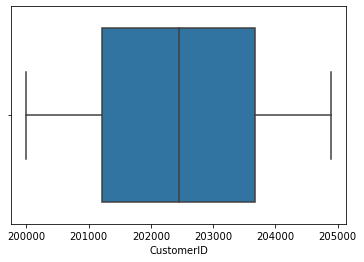

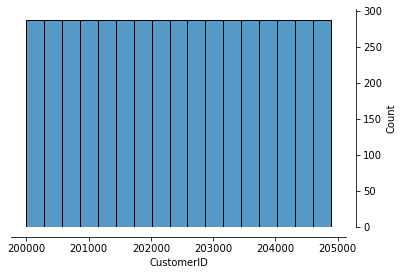


The mean is 202443.5, which is equal to the median value of 202443.5.
The skewness of the distribution is 0.0 which is considered to be exactly symmetric.
End of univariate analysis for this variable, CustomerID.
-------------------------------------------------------------------------------


Now considering the variable ProdTaken...



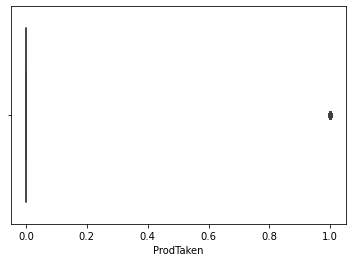

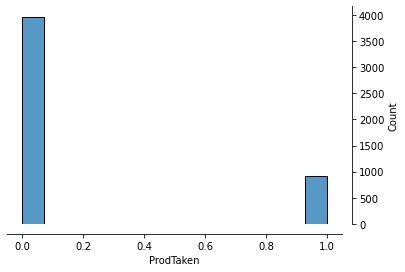


The mean is 0.188, which is bigger than the median value of 0.0.
The skewness of the distribution is 1.595 which is considered to be highly skewed.
This variable is left-skewed.  End of univariate analysis for this ProdTaken variable.
-------------------------------------------------------------------------------


Now considering the variable Age...



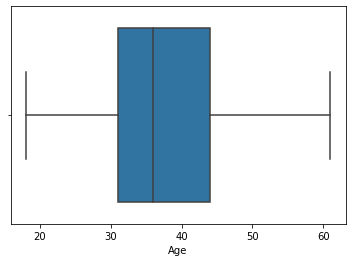

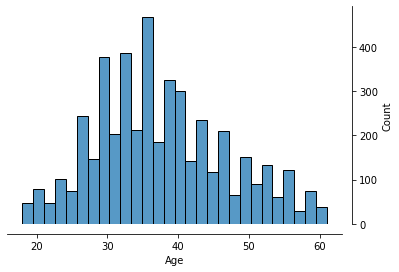


The mean is 37.622, which is bigger than the median value of 36.0.
The skewness of the distribution is 0.383 which is considered to be approximately symmetric.
End of univariate analysis for this variable, Age.
-------------------------------------------------------------------------------


Now considering the variable CityTier...



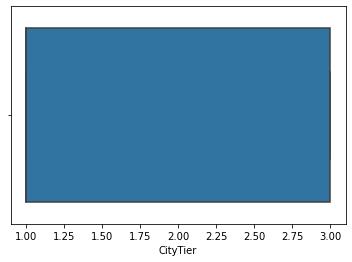

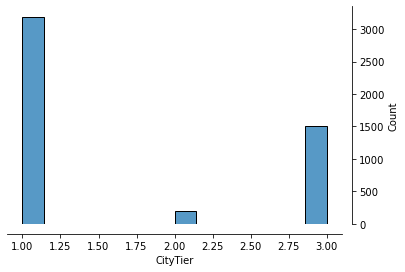


The mean is 1.654, which is bigger than the median value of 1.0.
The skewness of the distribution is 0.736 which is considered to be moderately skewed.
This variable is left-skewed.  End of univariate analysis for this CityTier variable.
-------------------------------------------------------------------------------


Now considering the variable DurationOfPitch...



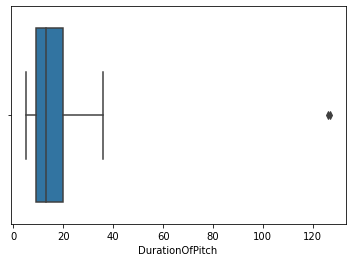

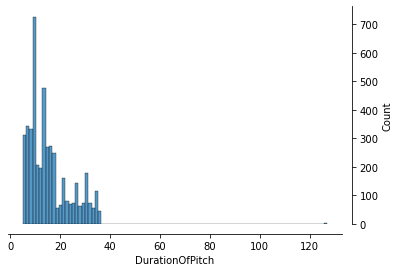


The mean is 15.491, which is bigger than the median value of 13.0.
The skewness of the distribution is 1.751 which is considered to be highly skewed.
This variable is left-skewed.  End of univariate analysis for this DurationOfPitch variable.
-------------------------------------------------------------------------------


Now considering the variable NumberOfPersonVisited...



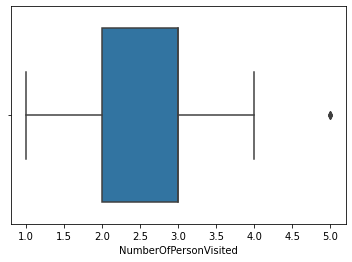

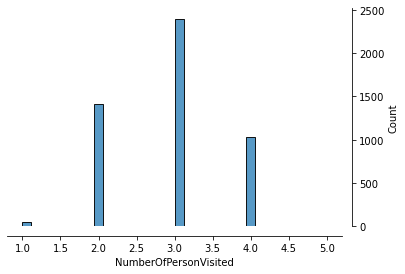


The mean is 2.905, which is less than the median value of 3.0.
The skewness of the distribution is 0.03 which is considered to be approximately symmetric.
End of univariate analysis for this variable, NumberOfPersonVisited.
-------------------------------------------------------------------------------


Now considering the variable NumberOfFollowups...



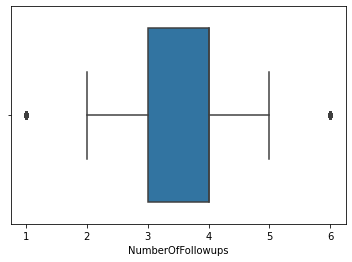

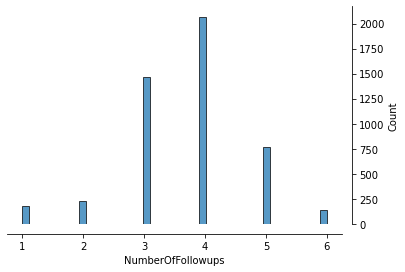


The mean is 3.708, which is less than the median value of 4.0.
The skewness of the distribution is -0.373 which is considered to be approximately symmetric.
End of univariate analysis for this variable, NumberOfFollowups.
-------------------------------------------------------------------------------


Now considering the variable PreferredPropertyStar...



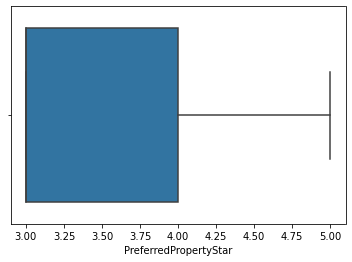

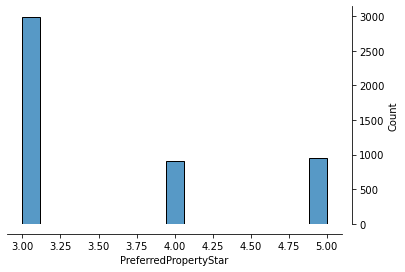


The mean is 3.581, which is bigger than the median value of 3.0.
The skewness of the distribution is 0.895 which is considered to be moderately skewed.
This variable is left-skewed.  End of univariate analysis for this PreferredPropertyStar variable.
-------------------------------------------------------------------------------


Now considering the variable NumberOfTrips...



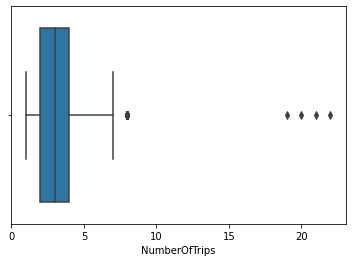

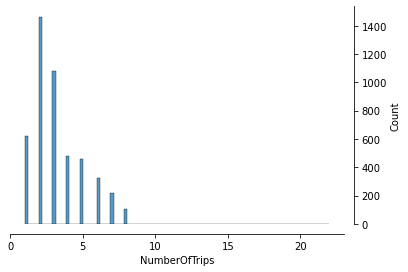


The mean is 3.237, which is bigger than the median value of 3.0.
The skewness of the distribution is 1.453 which is considered to be highly skewed.
This variable is left-skewed.  End of univariate analysis for this NumberOfTrips variable.
-------------------------------------------------------------------------------


Now considering the variable Passport...



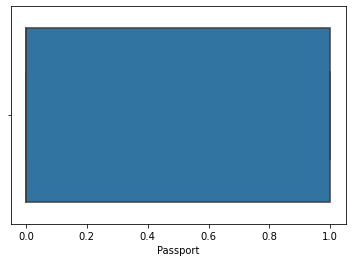

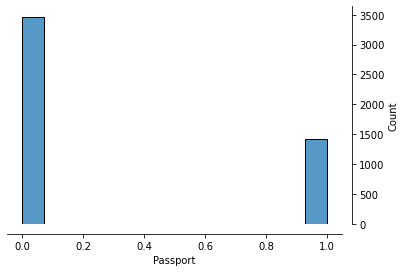


The mean is 0.291, which is bigger than the median value of 0.0.
The skewness of the distribution is 0.921 which is considered to be moderately skewed.
This variable is left-skewed.  End of univariate analysis for this Passport variable.
-------------------------------------------------------------------------------


Now considering the variable PitchSatisfactionScore...



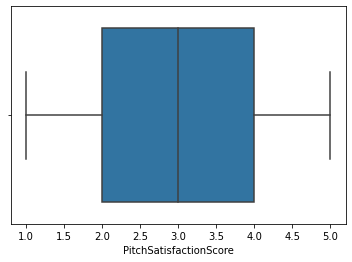

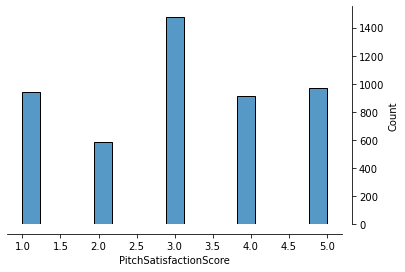


The mean is 3.078, which is bigger than the median value of 3.0.
The skewness of the distribution is -0.128 which is considered to be approximately symmetric.
End of univariate analysis for this variable, PitchSatisfactionScore.
-------------------------------------------------------------------------------


Now considering the variable OwnCar...



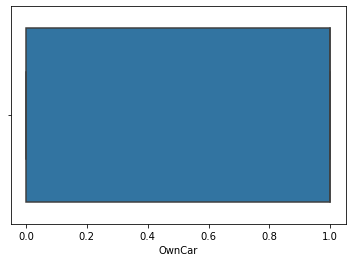

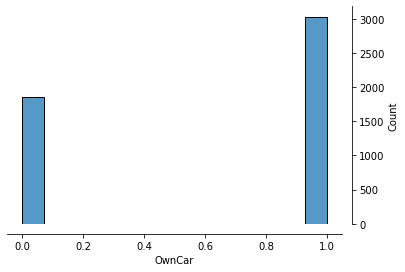


The mean is 0.62, which is less than the median value of 1.0.
The skewness of the distribution is -0.496 which is considered to be approximately symmetric.
End of univariate analysis for this variable, OwnCar.
-------------------------------------------------------------------------------


Now considering the variable NumberOfChildrenVisited...



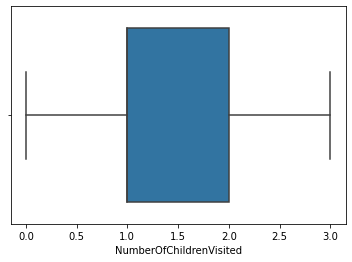

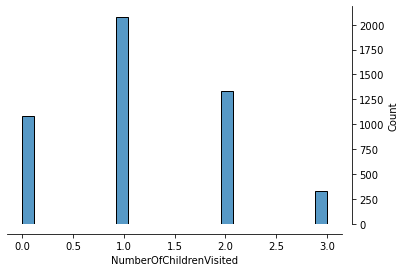


The mean is 1.187, which is bigger than the median value of 1.0.
The skewness of the distribution is 0.272 which is considered to be approximately symmetric.
End of univariate analysis for this variable, NumberOfChildrenVisited.
-------------------------------------------------------------------------------


Now considering the variable MonthlyIncome...



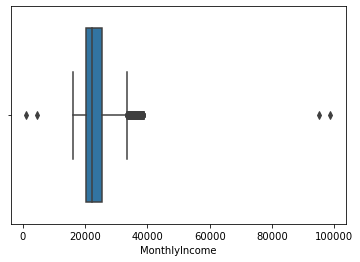

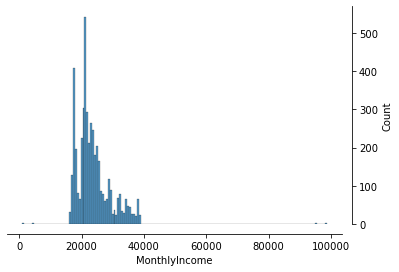


The mean is 23619.853, which is bigger than the median value of 22347.0.
The skewness of the distribution is 1.949 which is considered to be highly skewed.
This variable is left-skewed.  End of univariate analysis for this MonthlyIncome variable.
-------------------------------------------------------------------------------




In [10]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

for col in numeric_cols:
    my_numeric_univariate_analysis_function(my_col = col, input_dataframe = df)

In [11]:
df[['DurationOfPitch', 'ProdTaken']].sort_values(by='DurationOfPitch', ascending = False)

,DurationOfPitch,ProdTaken
3878,127.0,0
1434,126.0,0
2796,36.0,0
2868,36.0,0
2648,36.0,1
...,...,...
4215,NaN,0
4427,NaN,1
4641,NaN,0
4678,NaN,0


In [12]:
def my_categorical_univariate_analysis_function(my_col, input_dataframe = df):
    print("Now considering the variable {0}...\n".format(my_col))
    
    # Countplot
    sns.set(rc={'figure.figsize':(15,7)})
    ax = sns.countplot(data = input_dataframe, x = my_col);
    
    total = len(input_dataframe[my_col])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.25 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 14) # annotate the percantage 
        
    plt.show() # show the plot
    
    # mode
    mode_list = statistics.multimode(input_dataframe[my_col])
    if len(mode_list) == 1:
        mode = mode_list[0]
        mode_part = sum(input_dataframe[my_col] == mode)
        mode_pct = round(100 * mode_part/len(input_dataframe[my_col]), 2)
        print("The mode for {my_col} is {mode}.".format(my_col = my_col, mode = mode))
        print("The mode represents {mode_pct}% of the data.".format(mode_pct = mode_pct))
        
    else:
        mode = mode_list
        print("The modes for {my_col} are {mode}.".format(my_col = my_col, mode = mode))
    
    print("-------------------------------------------------------------------------------\n\n")

After quickly passing through all the variables based on their initial encoding, I'm going to drop one and reclassify a few.
Since tree-based algorithms don't need the "categoricalize" discrete variables and ordinal categorical variables in order to work, I'm only going to turn the binary variables into categorical ones.  I will preserve the others in their original numerical form to preserve that ordinal signal with the minimum amount of work.

In [13]:
# looking for unique values
   # Columns with all unique values are individual identifiers and should have no generalizable predictive power.
   # Columns with only two unique values are bernoulli variables. 
df.nunique().sort_values(ascending = False)

CustomerID                 4888
MonthlyIncome              2475
Age                          44
DurationOfPitch              34
NumberOfTrips                12
NumberOfFollowups             6
Designation                   5
PitchSatisfactionScore        5
ProductPitched                5
NumberOfPersonVisited         5
MaritalStatus                 4
Occupation                    4
NumberOfChildrenVisited       4
Gender                        3
CityTier                      3
PreferredPropertyStar         3
ProdTaken                     2
TypeofContact                 2
Passport                      2
OwnCar                        2
dtype: int64

Columns with all unique values are individual identifiers and should have no generalizable predictive power.  (drop)
- CustomerID

Columns with only two unique values are bernoulli variables. (convert to categorical)
- ProdTaken
- TypeofContact
- Passport
- OwnCar

In [14]:
# I'm preserve the initial dataframe in case I need to reverse some of these decisions later or to see the data in the raw form later.
archive_df = df.copy()

#  Dropping CustomerID
# I made this a try-except block just in case I run through this cell multiple times without restarting the kernel.
try:
    df = df.drop(columns='CustomerID')
except:
    print("I already dropped CustomerID.")

# Converting binary variables to category type.
columns_to_convert = ['ProdTaken', 'TypeofContact', 'Passport', 'OwnCar']
for col in columns_to_convert:
    df[col] = df[col].astype('category')

In [15]:
# check datatype to make sure the conversions went through.
df.dtypes

ProdTaken                  category
Age                         float64
TypeofContact              category
CityTier                      int64
DurationOfPitch             float64
Occupation                   object
Gender                       object
NumberOfPersonVisited         int64
NumberOfFollowups           float64
ProductPitched               object
PreferredPropertyStar       float64
MaritalStatus                object
NumberOfTrips               float64
Passport                   category
PitchSatisfactionScore        int64
OwnCar                     category
NumberOfChildrenVisited     float64
Designation                  object
MonthlyIncome               float64
dtype: object

Now considering the variable ProdTaken...



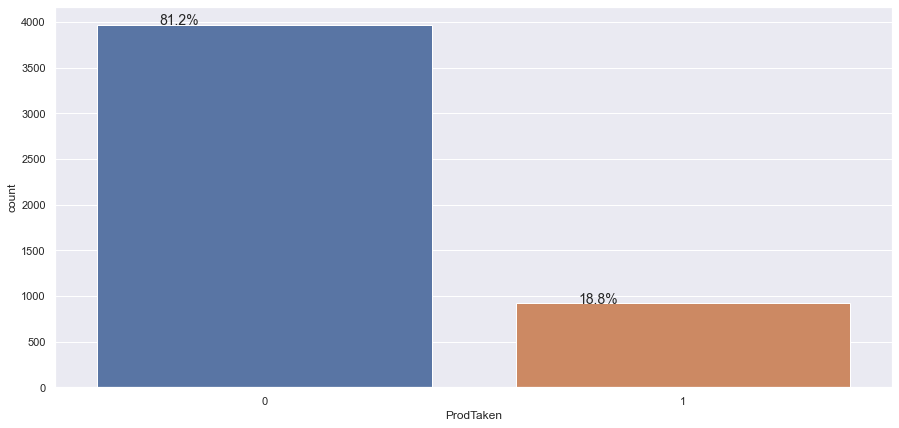

The mode for ProdTaken is 0.
The mode represents 81.18% of the data.
-------------------------------------------------------------------------------


Now considering the variable TypeofContact...



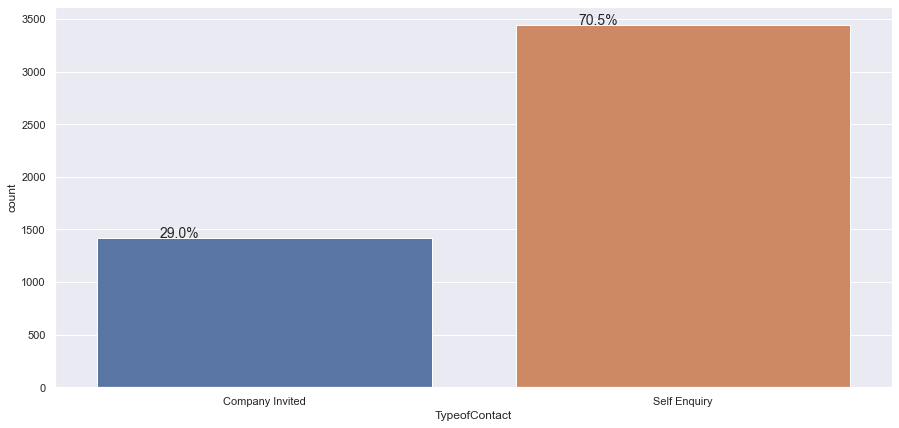

The mode for TypeofContact is Self Enquiry.
The mode represents 70.46% of the data.
-------------------------------------------------------------------------------


Now considering the variable Passport...



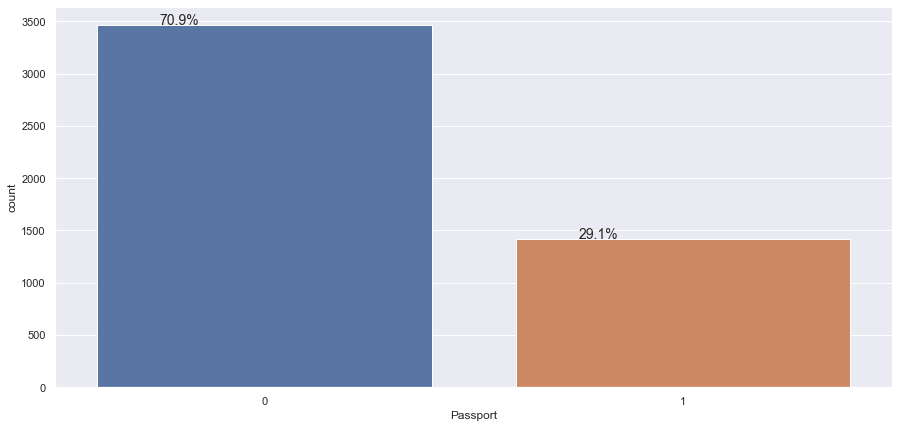

The mode for Passport is 0.
The mode represents 70.91% of the data.
-------------------------------------------------------------------------------


Now considering the variable OwnCar...



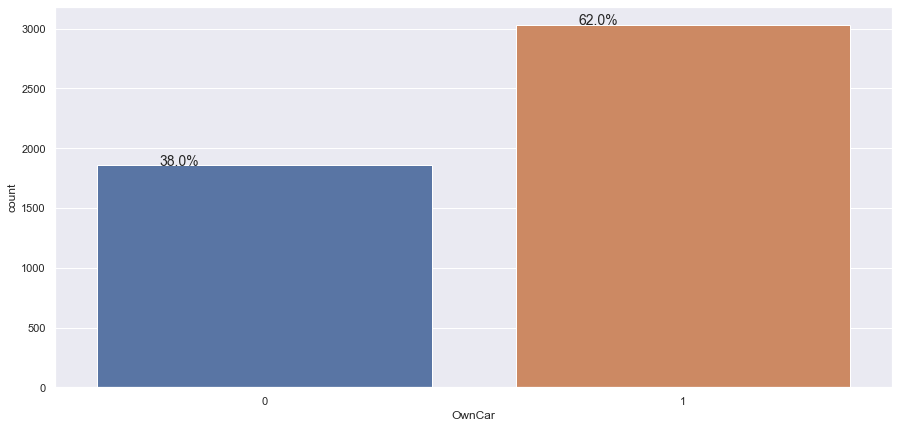

The mode for OwnCar is 1.
The mode represents 62.03% of the data.
-------------------------------------------------------------------------------




In [16]:
# Although all of the variables have been through some sort of univariate analysis,
#  now that I've reclassified four variables into category-type, I'd like to see
#  what they look like with the categorical univariate analysis function applied.

cat_cols = df.select_dtypes(include='category').columns.tolist()

for col in cat_cols:
    my_categorical_univariate_analysis_function(my_col = col, input_dataframe = df)

#### Bivariate analysis

I'm still learning what this means, exactly what the grader is looking for, or what a bivariate analysis deliverable in the business world would contain.  I assume at work, my boss or a project stakeholder or a colleague would point out which variables were interesting for further analysis.  Here, in the GreatLearning program, I asked in the discussion board and received a non-answer.

I will try to analyze each variable pairwise with the dependent variable.

In [17]:
# Taking a look at all the variables.
df.columns.to_list()

['ProdTaken',
 'Age',
 'TypeofContact',
 'CityTier',
 'DurationOfPitch',
 'Occupation',
 'Gender',
 'NumberOfPersonVisited',
 'NumberOfFollowups',
 'ProductPitched',
 'PreferredPropertyStar',
 'MaritalStatus',
 'NumberOfTrips',
 'Passport',
 'PitchSatisfactionScore',
 'OwnCar',
 'NumberOfChildrenVisited',
 'Designation',
 'MonthlyIncome']

In [18]:
y_variable = 'ProdTaken'

In [19]:
# Couldn't figure out how to do this in one-line.
x_variables = df.columns.to_list()  # Gets all variables from dataframe
x_variables.remove(y_variable)      # removes the dependent variable 
print(x_variables)                  # Now we have just the x's.

['Age', 'TypeofContact', 'CityTier', 'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisited', 'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisited', 'Designation', 'MonthlyIncome']


In [20]:
def my_t_test(x_var, y_var, input_dataframe = df, alpha = .05):
    '''
    Calculating summary statistics and performing a t-test from those summary statistics.
    This version will only be used for a two-tailed t-test for simplicity.
    Could be enhanced later.
    '''
    x0 = input_dataframe[input_dataframe[y_var] == 0][x_var].mean()  # x-bar_0
    x1 = input_dataframe[input_dataframe[y_var] == 1][x_var].mean() # x-bar_1
    s0 = input_dataframe[input_dataframe[y_var] == 0][x_var].std() # std_0
    s1 = input_dataframe[input_dataframe[y_var] == 1][x_var].std() # std_1
    n0 = input_dataframe[input_dataframe[y_var] == 0][x_var].count() 
    n1 = input_dataframe[input_dataframe[y_var] == 1][x_var].count()
    
    pooled_variance = (((n1-1) * (s1 ** 2)) + ((n0-1) * (s0 ** 2)))/(n1 + n0 -2)
    t = (x1 - x0)/np.sqrt(pooled_variance * ((1/n1) + (1/n0)))
    degrees_of_freedom = ((((s1**2)/n1) + ((s0**2)/n0)) ** 2)/((((s1**2)/n1)**2)/(n1-1) + (((s0**2)/n0)**2)/(n0-1))
    crit_t = scipy.stats.t.ppf(1-(alpha/2), degrees_of_freedom)
    pval = scipy.stats.t.sf(np.abs(t), degrees_of_freedom - 1) * 2
    my_output = [["t", "df", "crit_t", "p"], [t, degrees_of_freedom, crit_t, pval]]
    return(my_output)

In [21]:
# This function handles bivariate analysis.  (Default parameters for this y_var and this input_dataframe)
def my_bivariate_analysis_function(x_var, y_var = y_variable, input_dataframe = df, alpha = 0.05):
    sns.set(rc={'figure.figsize':(21,7)})
    
    print("Now considering the variable {0} vs {1}...\n".format(x_var, y_var))
    
    # If it is a numeric variable, execute a violinplot bivariate analysis.
    if str(input_dataframe[x_var].dtype) == 'float64' or str(df[x_var].dtype) == 'int64':
        
        x_bar_0 = round(input_dataframe[input_dataframe[y_var] == 0][x_var].mean(), 2)
        x_bar_1 = round(input_dataframe[input_dataframe[y_var] == 1][x_var].mean(), 2)
        if math.isnan(x_bar_0):
            pass
        else:
            print("The mean {x_var} of those who have {y_var} is {x_bar_1}.".format(x_var = x_var, y_var = y_var, x_bar_1 = x_bar_1))
            print("The mean {x_var} of those who have not {y_var} is {x_bar_0}.".format(x_var = x_var, y_var = y_var, x_bar_0 = x_bar_0))
            my_t = my_t_test(x_var = x_var, y_var = y_var)[1][0]  #  This grabs the t-statistic from my function.
            my_p = my_t_test(x_var = x_var, y_var = y_var)[1][3]  #  This grabs the p-value from my function.
        
            if(my_p < alpha):
                print("This difference in means is significant.\n\t(p-value = {p}; t-stat = {t}).".format(p = my_p, t = round(my_t, 3)))
            else:
                print("This difference in means is not statistically significant.")
        
        col1 = y_var
        col2 = x_var
        data = input_dataframe
        sns.catplot(x=col1, y=col2, kind='violin', data=data);
        plt.show()
        
    # If it is a non-numeric variable, 
    elif str(input_dataframe[x_var].dtype) == 'category' or str(input_dataframe[x_var].dtype) == 'object':
        col1 = y_var
        col2 = x_var
        data = df
        sns.catplot(hue=col1, x=col2, kind='count', data=data).set_xticklabels(rotation = 45);
        plt.show()
    
    # Just here in case I encounter a different dtype in the future.
    else:
        print("This variable has a different dtype.  It is {x}.".format(x = str(input_dataframe[x_var].dtype)))  
    print("-------------------------------------------------------------------------------\n\n")

Now considering the variable Age vs ProdTaken...

The mean Age of those who have ProdTaken is 34.77.
The mean Age of those who have not ProdTaken is 38.28.
This difference in means is significant.
	(p-value = 2.400313597084672e-23; t-stat = -10.163).


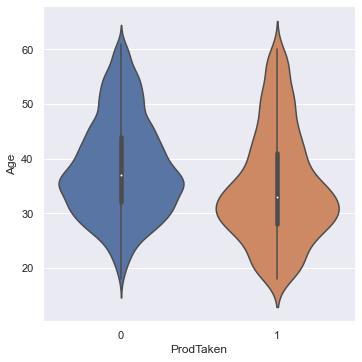

-------------------------------------------------------------------------------


Now considering the variable TypeofContact vs ProdTaken...



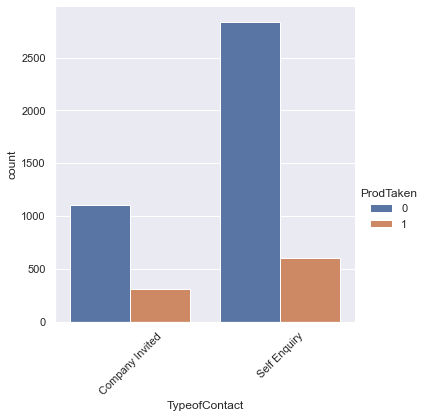

-------------------------------------------------------------------------------


Now considering the variable CityTier vs ProdTaken...

The mean CityTier of those who have ProdTaken is 1.82.
The mean CityTier of those who have not ProdTaken is 1.62.
This difference in means is significant.
	(p-value = 1.4425076765940377e-09; t-stat = 6.094).


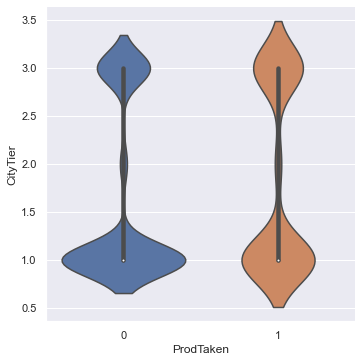

-------------------------------------------------------------------------------


Now considering the variable DurationOfPitch vs ProdTaken...

The mean DurationOfPitch of those who have ProdTaken is 16.87.
The mean DurationOfPitch of those who have not ProdTaken is 15.17.
This difference in means is significant.
	(p-value = 1.069596325974507e-07; t-stat = 5.344).


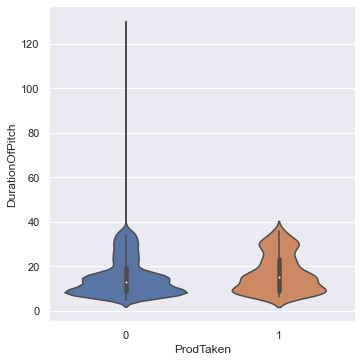

-------------------------------------------------------------------------------


Now considering the variable Occupation vs ProdTaken...



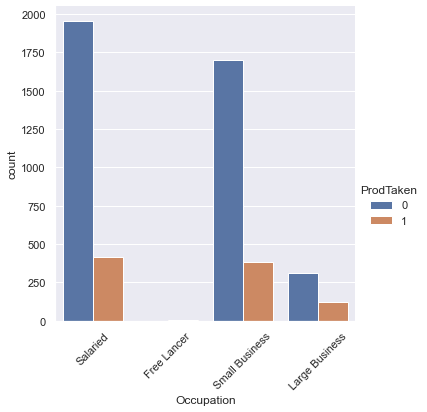

-------------------------------------------------------------------------------


Now considering the variable Gender vs ProdTaken...



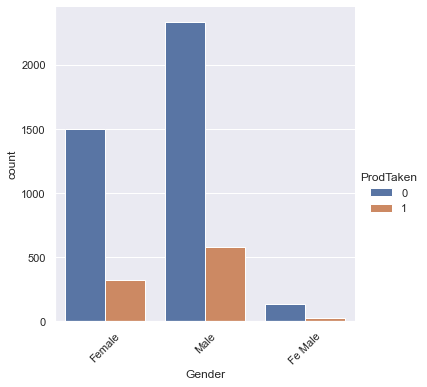

-------------------------------------------------------------------------------


Now considering the variable NumberOfPersonVisited vs ProdTaken...

The mean NumberOfPersonVisited of those who have ProdTaken is 2.92.
The mean NumberOfPersonVisited of those who have not ProdTaken is 2.9.
This difference in means is not statistically significant.


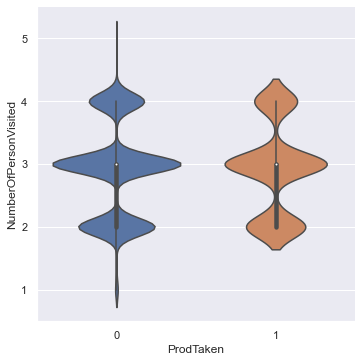

-------------------------------------------------------------------------------


Now considering the variable NumberOfFollowups vs ProdTaken...

The mean NumberOfFollowups of those who have ProdTaken is 3.94.
The mean NumberOfFollowups of those who have not ProdTaken is 3.65.
This difference in means is significant.
	(p-value = 8.149358243440322e-15; t-stat = 7.854).


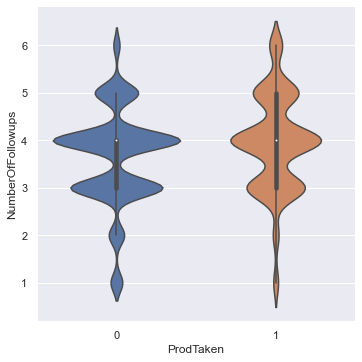

-------------------------------------------------------------------------------


Now considering the variable ProductPitched vs ProdTaken...



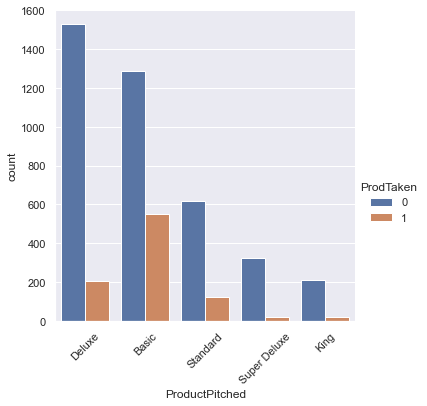

-------------------------------------------------------------------------------


Now considering the variable PreferredPropertyStar vs ProdTaken...

The mean PreferredPropertyStar of those who have ProdTaken is 3.75.
The mean PreferredPropertyStar of those who have not ProdTaken is 3.54.
This difference in means is significant.
	(p-value = 4.836352879714101e-12; t-stat = 6.977).


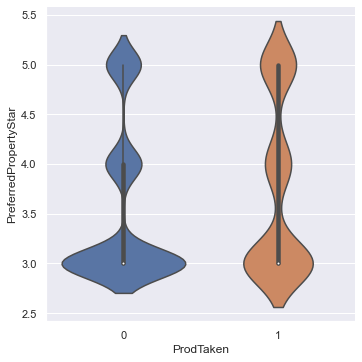

-------------------------------------------------------------------------------


Now considering the variable MaritalStatus vs ProdTaken...



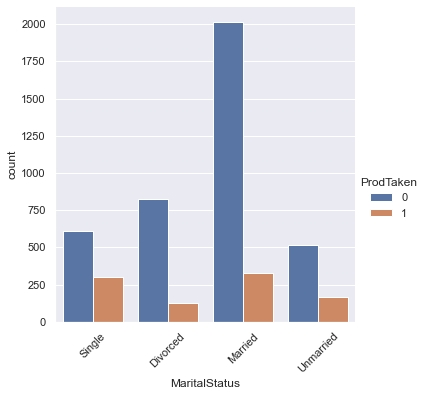

-------------------------------------------------------------------------------


Now considering the variable NumberOfTrips vs ProdTaken...

The mean NumberOfTrips of those who have ProdTaken is 3.31.
The mean NumberOfTrips of those who have not ProdTaken is 3.22.
This difference in means is not statistically significant.


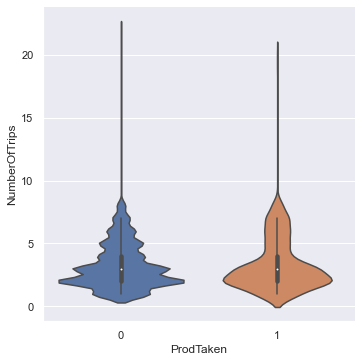

-------------------------------------------------------------------------------


Now considering the variable Passport vs ProdTaken...



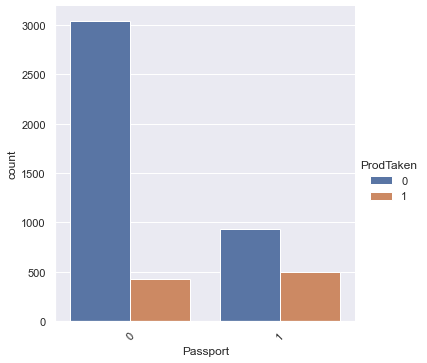

-------------------------------------------------------------------------------


Now considering the variable PitchSatisfactionScore vs ProdTaken...

The mean PitchSatisfactionScore of those who have ProdTaken is 3.22.
The mean PitchSatisfactionScore of those who have not ProdTaken is 3.04.
This difference in means is significant.
	(p-value = 0.00033277464099269337; t-stat = 3.597).


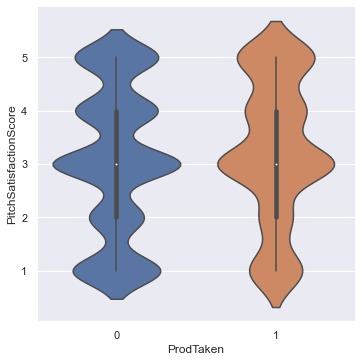

-------------------------------------------------------------------------------


Now considering the variable OwnCar vs ProdTaken...



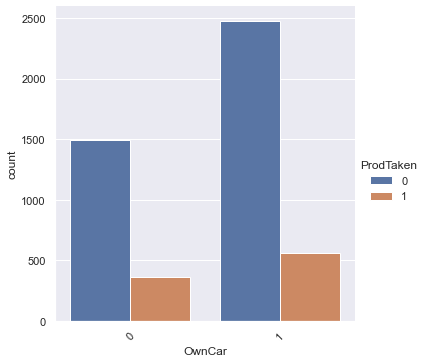

-------------------------------------------------------------------------------


Now considering the variable NumberOfChildrenVisited vs ProdTaken...

The mean NumberOfChildrenVisited of those who have ProdTaken is 1.2.
The mean NumberOfChildrenVisited of those who have not ProdTaken is 1.18.
This difference in means is not statistically significant.


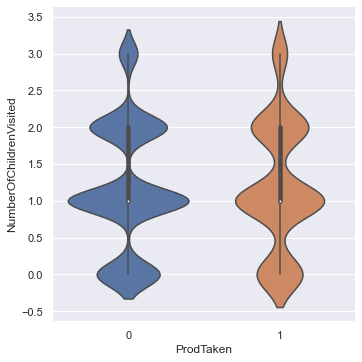

-------------------------------------------------------------------------------


Now considering the variable Designation vs ProdTaken...



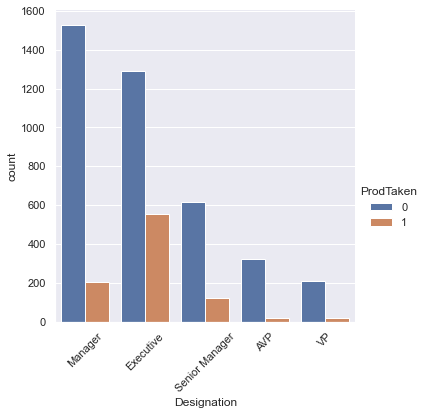

-------------------------------------------------------------------------------


Now considering the variable MonthlyIncome vs ProdTaken...

The mean MonthlyIncome of those who have ProdTaken is 22172.83.
The mean MonthlyIncome of those who have not ProdTaken is 23960.96.
This difference in means is significant.
	(p-value = 7.484357088554428e-19; t-stat = -8.985).


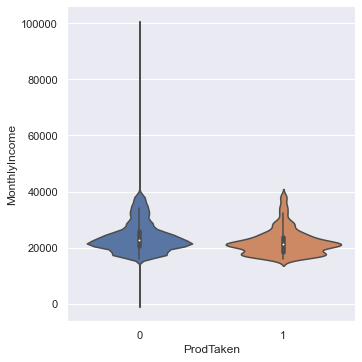

-------------------------------------------------------------------------------




In [22]:
for x_var in x_variables:
    my_bivariate_analysis_function(x_var)

#### Use appropriate visualizations to identify the patterns and insights

In [23]:
# I think the univariate and bivariate analysis sections took care of that sufficiently.

#### Come up with a customer profile (characteristics of a customer) of the different packages

A more sophisticated way to do this would include clustering or other unsupervised techniques.  We have yet to cover those.

I am instead going to present some simple means and modes.  I will also re-employ the bivariate analysis function I built earlier, but I will use the ProductPitched as the new dependent variable so we can see the relationship between it and the other variables to get our profile.

In [24]:
takers_only_df = df[df['ProdTaken'] == 1]
takers_only_df.drop(columns='ProdTaken', inplace = True)

In [25]:
def quick_profile_builder(filter_value, filter_var = 'ProductPitched', input_df = takers_only_df):
    '''
    This function will give mean and mode values for different values of the variable of interest.
    There are better ways to do this, i.e., clustering or other unsupervised learning techniques, but we have not yet covered those.
    '''
    mean_col = pd.DataFrame(takers_only_df[takers_only_df[filter_var] == filter_value].mean()).rename(columns={0:'mean_value'})
    
    # Adding the mean after the end to handle multimodal features.  (Monthly income)
    mode_col = pd.DataFrame(takers_only_df[takers_only_df[filter_var] == filter_value].mode().mean()).rename(columns={0:'mode_value'})
    
    output_df = pd.concat([mean_col, mode_col], axis = 1)
    return(output_df)

In [26]:
possible_values = takers_only_df['ProductPitched'].unique().tolist()

for value in possible_values:
    print("Now building a profile for the common customer of the {x} product....\n".format(x = value))
    print(quick_profile_builder(value))
    print("\nEnd of customer profile for {x} product.".format(x = value), "-" * 75, sep='\n', end = '\n\n')

Now building a profile for the common customer of the Deluxe product....

                           mean_value  mode_value
Age                         37.641414        32.0
CityTier                     2.411765         3.0
DurationOfPitch             19.100000        15.0
NumberOfPersonVisited        2.950980         3.0
NumberOfFollowups            3.970000         4.0
PreferredPropertyStar        3.699507         3.0
NumberOfTrips                3.702970         2.0
PitchSatisfactionScore       3.039216         3.0
NumberOfChildrenVisited      1.172414         1.0
MonthlyIncome            23106.215385     22185.0

End of customer profile for Deluxe product.
---------------------------------------------------------------------------

Now building a profile for the common customer of the Basic product....

                           mean_value  mode_value
Age                         31.289320        29.0
CityTier                     1.510870         1.0
DurationOfPitch             15.

The easiest parts to notice that differ between the product types customer profiles are the Age, Duration of Pitch, and the Monthly Income.

In [27]:
takers_only_df.columns

Index(['Age', 'TypeofContact', 'CityTier', 'DurationOfPitch', 'Occupation',
       'Gender', 'NumberOfPersonVisited', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisited', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [28]:
takers_only_df[['ProductPitched', 'Age', 'DurationOfPitch', 'MonthlyIncome']].groupby('ProductPitched').mean().sort_values(by='MonthlyIncome')

,Age,DurationOfPitch,MonthlyIncome
ProductPitched,,,
Basic,31.289320,15.791353,20161.529301
Deluxe,37.641414,19.100000,23106.215385
Standard,41.008130,19.065041,26035.419355
Super Deluxe,43.500000,18.500000,29823.800000
King,48.900000,10.500000,34672.100000


Because there isn't really any meaningful information in the data dictionary explaining what these packages are, I've sorted this list by MonthlyIncome.  If the price of the product is correlated to the income of the customer (as one would expect), then we can see that the 'Standard' package is better than the 'Deluxe' package, which I would not have guessed.  This same pattern holds if we sort by age, so there is either a big mismatch going on with the market targeting, or our company may want to rename the packages.

To me, a more logical ordering would be:  
   Basic < Standard < Deluxe < Super Deluxe < King.

Now considering the variable Age vs ProductPitched...



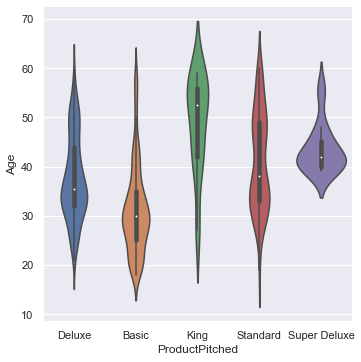

-------------------------------------------------------------------------------


Now considering the variable TypeofContact vs ProductPitched...



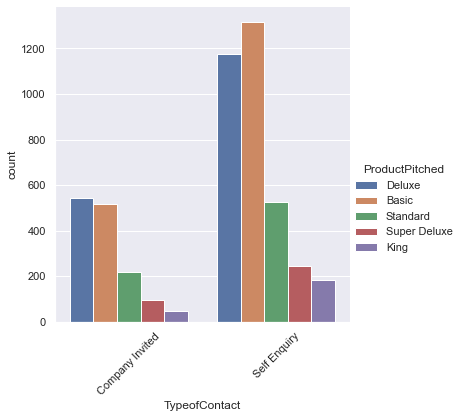

-------------------------------------------------------------------------------


Now considering the variable CityTier vs ProductPitched...



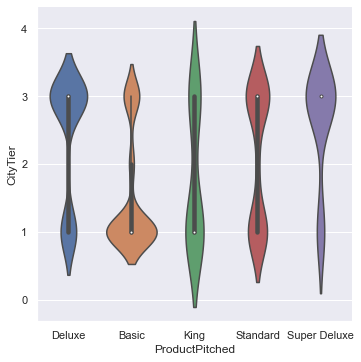

-------------------------------------------------------------------------------


Now considering the variable DurationOfPitch vs ProductPitched...



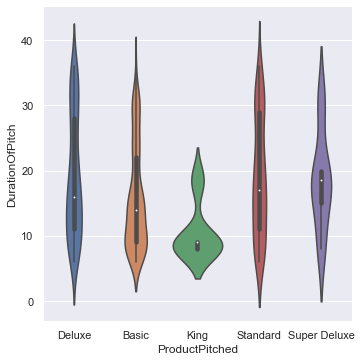

-------------------------------------------------------------------------------


Now considering the variable Occupation vs ProductPitched...



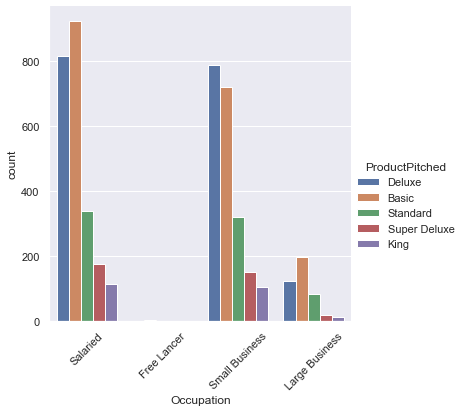

-------------------------------------------------------------------------------


Now considering the variable Gender vs ProductPitched...



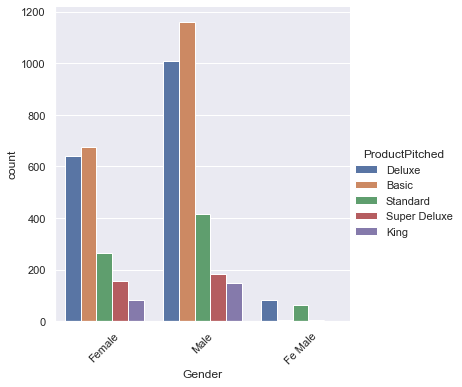

-------------------------------------------------------------------------------


Now considering the variable NumberOfPersonVisited vs ProductPitched...



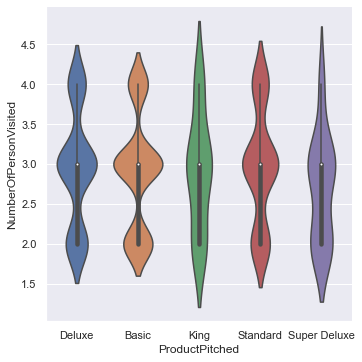

-------------------------------------------------------------------------------


Now considering the variable NumberOfFollowups vs ProductPitched...



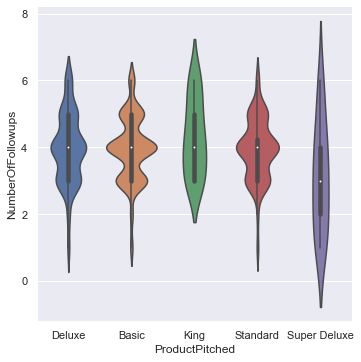

-------------------------------------------------------------------------------


Now considering the variable PreferredPropertyStar vs ProductPitched...



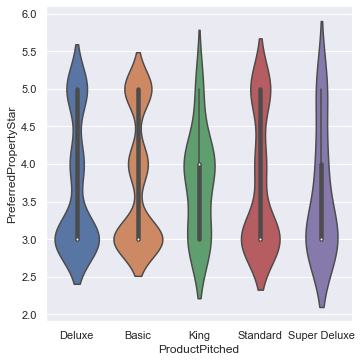

-------------------------------------------------------------------------------


Now considering the variable MaritalStatus vs ProductPitched...



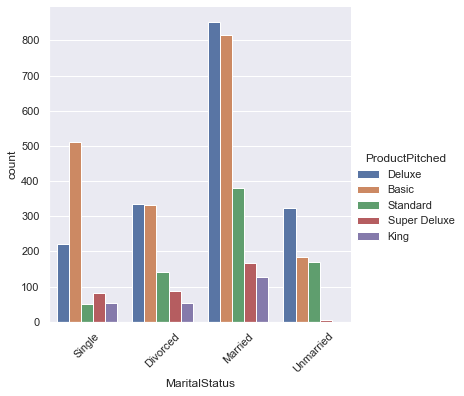

-------------------------------------------------------------------------------


Now considering the variable NumberOfTrips vs ProductPitched...



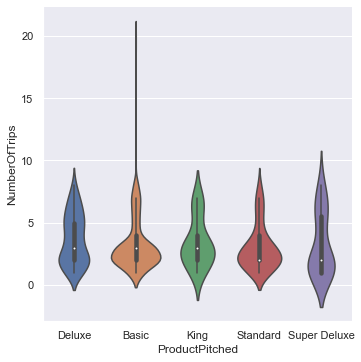

-------------------------------------------------------------------------------


Now considering the variable Passport vs ProductPitched...



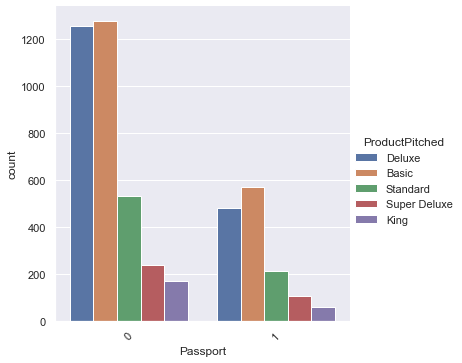

-------------------------------------------------------------------------------


Now considering the variable PitchSatisfactionScore vs ProductPitched...



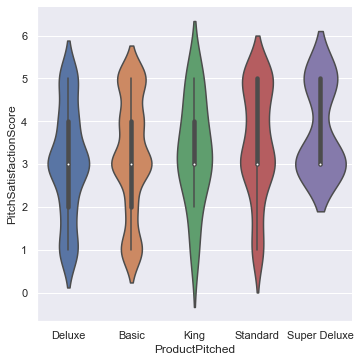

-------------------------------------------------------------------------------


Now considering the variable OwnCar vs ProductPitched...



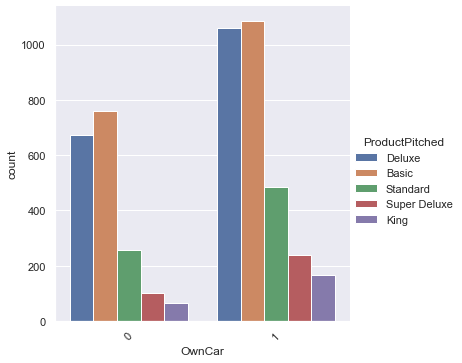

-------------------------------------------------------------------------------


Now considering the variable NumberOfChildrenVisited vs ProductPitched...



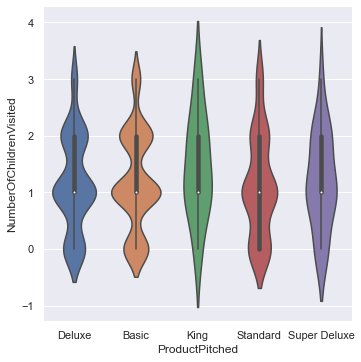

-------------------------------------------------------------------------------


Now considering the variable Designation vs ProductPitched...



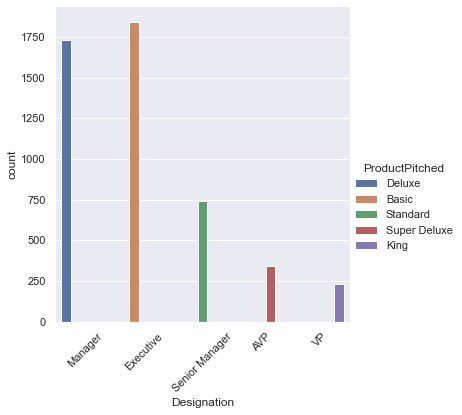

-------------------------------------------------------------------------------


Now considering the variable MonthlyIncome vs ProductPitched...



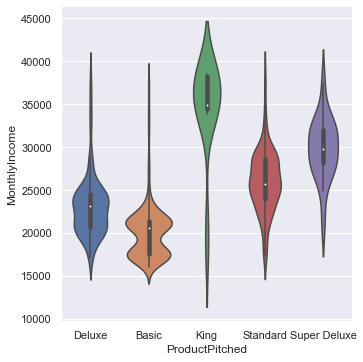

-------------------------------------------------------------------------------




In [29]:
y_var2 = 'ProductPitched'
x_variables2 = takers_only_df.columns.to_list()  # Gets all variables from dataframe
x_variables2.remove(y_var2)      # removes the dependent variable 

# Reusing the bivariate analysis function to look at the profiles of the different customers.
for x_var in x_variables2:
    my_bivariate_analysis_function(x_var, y_var = y_var2, input_dataframe = takers_only_df, alpha = 0.05)

#### Any other exploratory deep dive  

In [30]:
# In looking at age, I found a fair number of 18 year olds in this data set.
print(df[df['Age'] == df['Age'].min()].loc[:, ['ProdTaken', 'MaritalStatus', 'OwnCar', 'Designation', 'MonthlyIncome']])
avg_18_year_old_annual_income = df[df['Age'] == df['Age'].min()]['MonthlyIncome'].mean() * 12
print("\nWhen I see these numbers, I wonder what I did wrong in high school and before\n"
      + "to not be making ${:,.0f}".format(avg_18_year_old_annual_income) + 
      " per year within a year of high school graduation....")

     ProdTaken MaritalStatus OwnCar Designation  MonthlyIncome
296          1        Single      0   Executive        16420.0
301          0        Single      1   Executive        16200.0
457          1        Single      1   Executive        16878.0
727          0        Single      1   Executive        16051.0
828          1        Single      0   Executive        16904.0
972          0        Single      1   Executive        16611.0
1153         1        Single      0   Executive        16569.0
1311         0        Single      1   Executive        16514.0
1766         1        Single      1   Executive        16420.0
1771         0        Single      0   Executive        16200.0
1927         1        Single      1   Executive        16878.0
2197         0        Single      0   Executive        16051.0
2298         1        Single      1   Executive        16904.0
2442         1        Single      0   Executive        16611.0

When I see these numbers, I wonder what I did wrong in

In [31]:
print("The graphs earlier made it look like there were no 'Free Lancer' people.  Taking a closer look...")
num_free = df[['Occupation', 'Age']].groupby('Occupation').count().loc['Free Lancer', :][0]
print("It looks like there are actually {x} 'Free Lancer' people in our audience data.".format(x = num_free))

The graphs earlier made it look like there were no 'Free Lancer' people.  Taking a closer look...
It looks like there are actually 2 'Free Lancer' people in our audience data.


In [32]:
df[['Occupation', 'Age']].groupby('Occupation').count().loc['Free Lancer', :][0]

2

### Illustrate the insights based on EDA - 4 pts
#### Key meaningful observations on individual variables and the relationship between variables ##

###### I made a lot of statements in the analysis-generating functions I ran above, but here a few other insights or discoveries.
- city tier 2 is mostly empty -- useless.

- Most pitches last less 36 minutes or less.  There were two that were over two hours, and none in between.  The two that were ultra-long didn't result in sales, so I'd recommend dropping those.  I'm guessing the pitchman was trying to just take a friend to a movie or a sporting event and bill it as company time....

- The Occupation 'Free Lancer' has only two people in it.

- The Gender "Fe Male" needs to be recoded to "Female"

- The most successful (by probability of success) product is the Basic Package.

- In MaritalStatus, I'm not sure what the difference between 'Single' and 'Unmarried' is.  A real data dictionary would help me know whether I could merge these two or not.  In the meantime, it looks like Singles are the most likely to buy our packages.

- Potential clients having a passport are a lot more to buy our product than those without.  It's a small group, so we likely will still need to market to those without passports, but, in a pinch, when low on packages to sell, I would exclusively target those with passports.

- Those with the Designation 'Executive' appear to be the most likely to take one of our products.

### Data Pre-processing - 7 pts
#### Prepare the data for analysis

In [33]:
# First, I'll fix the 'Fe Male' issue.
df[['Gender', 'Age']].groupby('Gender').count()

,Age
Gender,
Fe Male,155
Female,1735
Male,2772


In [34]:
df['Gender'].replace('Fe Male', 'Female', inplace = True)
df[['Gender', 'Age']].groupby('Gender').count()

,Age
Gender,
Female,1890
Male,2772


#### Missing value Treatment

In [35]:
# During some earlier attempts, it looked like the category dtype was hampering a lot of my efforts.
df['TypeofContact'] = df['TypeofContact'].astype('object')

In [36]:
# looking for na values
df.isna().sum().sort_values(ascending = False)

DurationOfPitch            251
MonthlyIncome              233
Age                        226
NumberOfTrips              140
NumberOfChildrenVisited     66
NumberOfFollowups           45
PreferredPropertyStar       26
TypeofContact               25
Designation                  0
OwnCar                       0
PitchSatisfactionScore       0
Passport                     0
ProdTaken                    0
MaritalStatus                0
NumberOfPersonVisited        0
Gender                       0
Occupation                   0
CityTier                     0
ProductPitched               0
dtype: int64

In [37]:
# Taking all the columns with na values
missing_value_columns = df[df.columns[df.isna().any()]].columns.tolist()
missing_value_columns

['Age',
 'TypeofContact',
 'DurationOfPitch',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'NumberOfChildrenVisited',
 'MonthlyIncome']

In [38]:
for col in missing_value_columns:
    my_mode = df[col].mode()[0]
    print(my_mode)
    df[col].replace(np.nan, my_mode, inplace = True)

35.0
Self Enquiry
9.0
4.0
3.0
2.0
1.0
17342.0


In [39]:
# looking for na values
df.isna().sum().sort_values(ascending = False)

ProdTaken                  0
PreferredPropertyStar      0
Designation                0
NumberOfChildrenVisited    0
OwnCar                     0
PitchSatisfactionScore     0
Passport                   0
NumberOfTrips              0
MaritalStatus              0
ProductPitched             0
Age                        0
NumberOfFollowups          0
NumberOfPersonVisited      0
Gender                     0
Occupation                 0
DurationOfPitch            0
CityTier                   0
TypeofContact              0
MonthlyIncome              0
dtype: int64

In [40]:
# Returning this to category type (not sure if I need it to be, but doing it just in case).
df['TypeofContact'] = df['TypeofContact'].astype('category')

#### Outlier Detection (treat, if needed- why or why not )

I'm going to leave the outliers untreated for now.  Tree-based methods are less sensitive to outliers than the least-squares based methods we used previously.

I recall two Duration outliers and a few high-income outliers, if I need to come back later and scrub them out.

#### Feature Engineering

##### I'm going to drop the following variables:
| **column dropped** | **reason why**|
|----------------|-----------|
| PitchSatisfactionScore | We wouldn't know this until after the pitch was made. |
| NumberOfFollowups | We wouldn't know this until after the first pitch was made. |
| DurationOfPitch | We don't know this until the pitch is completed.  We are focusing on the customer pool here, not the behavior of the sales team. |

In [41]:
df.drop(columns = ['PitchSatisfactionScore', 'NumberOfFollowups', 'DurationOfPitch'], inplace = True)

#### Prepare data for modeling  

In [42]:
y = df[['ProdTaken']]
X = df.drop(columns = 'ProdTaken')
X = pd.get_dummies(X, X.select_dtypes(exclude=np.number).columns)

In [43]:
# Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, shuffle=True)

In [44]:
X_train.shape, X_test.shape

((3421, 33), (1467, 33))

###  Model building - Bagging - 4 pts

In [45]:
# I shamelessly took this from the Ensemble_Hands-On_Bagging notebook.
#   I usually at least modify or improve the code in some way, but not this time in the name of time....

##  Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [46]:
# I shamelessly took this from the Ensemble_Hands-On_Bagging notebook.
#   I usually at least modify or improve the code in some way, but not this time in the name of time....

##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    #Accuracy of the model
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc, test_acc, train_recall, test_recall, train_precision, test_precision))
        
    # If the flag is set to True then only the following print statements will be displayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ", train_acc)
        print("Accuracy on test set : ", test_acc)
        print("Recall on training set : ", train_recall)
        print("Recall on test set : ", test_recall)
        print("Precision on training set : ", train_precision)
        print("Precision on test set : ", test_precision)
    
    return score_list # returning the list with train and test scores

#### Build bagging classifier

In [47]:
#base_estimator for bagging classifier is a decision tree by default
bagging_classifier=BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

BaggingClassifier(random_state=1)

In [48]:
bagging_classifier_score = get_metrics_score(bagging_classifier)

Accuracy on training set :  0.9906460099386144
Accuracy on test set :  0.8875255623721882
Recall on training set :  0.9503205128205128
Recall on test set :  0.5337837837837838
Precision on training set :  0.9983164983164983
Precision on test set :  0.8540540540540541


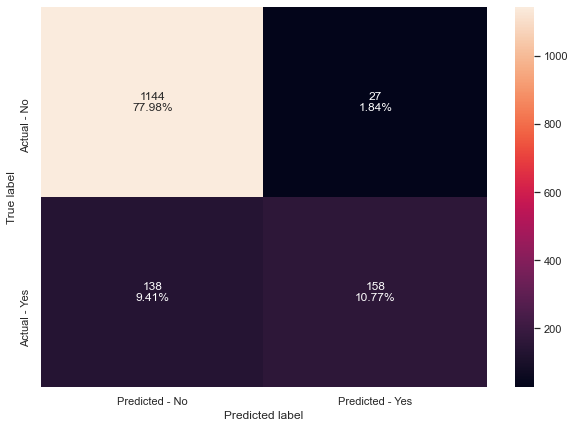

In [49]:
make_confusion_matrix(bagging_classifier,y_test)

#### random forest

In [50]:
rf_classifier=RandomForestClassifier(random_state=1)
rf_classifier.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [51]:
rf_classifier_score=get_metrics_score(rf_classifier)

Accuracy on training set :  1.0
Accuracy on test set :  0.8827539195637355
Recall on training set :  1.0
Recall on test set :  0.4797297297297297
Precision on training set :  1.0
Precision on test set :  0.8875


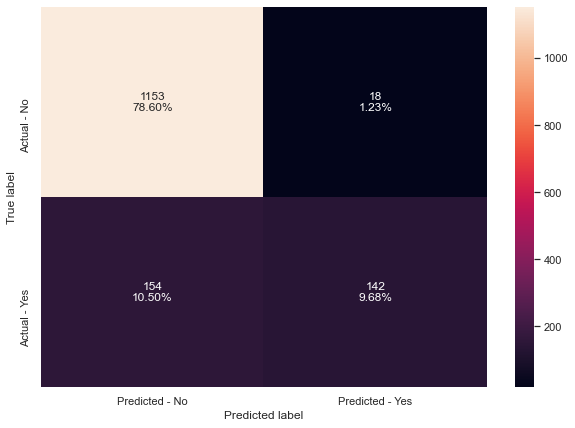

In [52]:
make_confusion_matrix(rf_classifier,y_test)

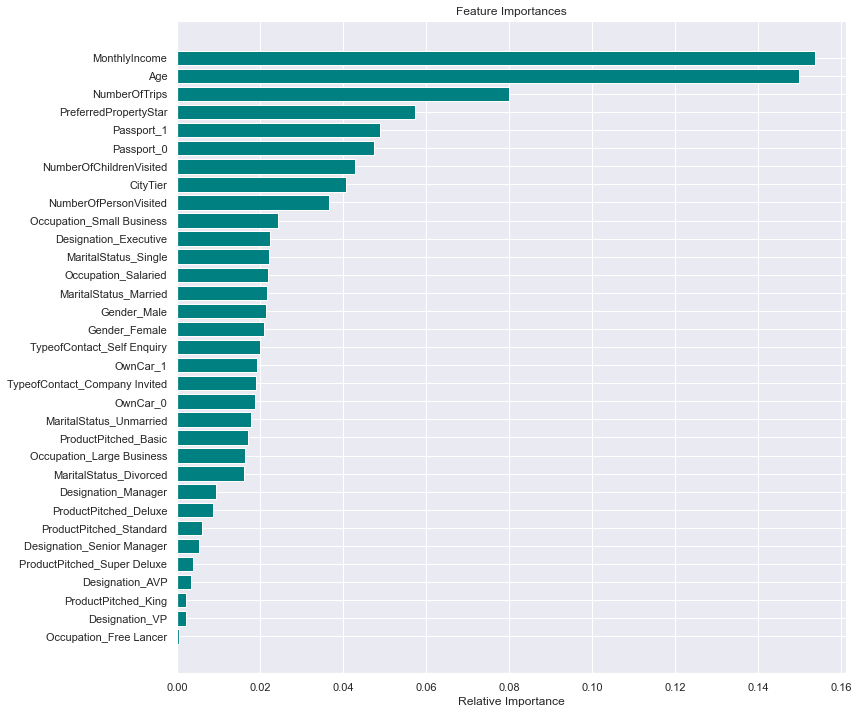

In [53]:
feature_names = X_train.columns
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='teal', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### decision tree

In [54]:
dtree=DecisionTreeClassifier(random_state=1)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [55]:
dtree_score=get_metrics_score(dtree)

Accuracy on training set :  1.0
Accuracy on test set :  0.8718473074301295
Recall on training set :  1.0
Recall on test set :  0.6587837837837838
Precision on training set :  1.0
Precision on test set :  0.6914893617021277


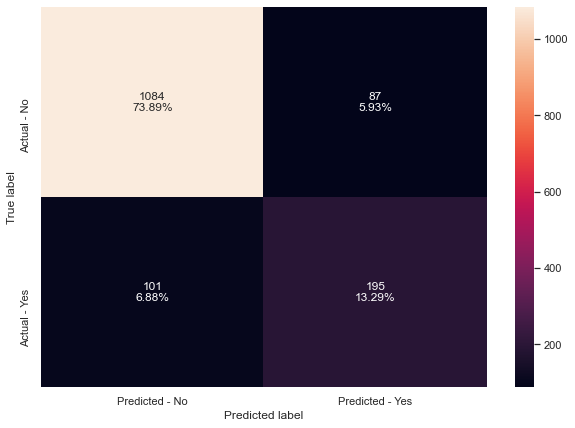

In [56]:
make_confusion_matrix(dtree,y_test)

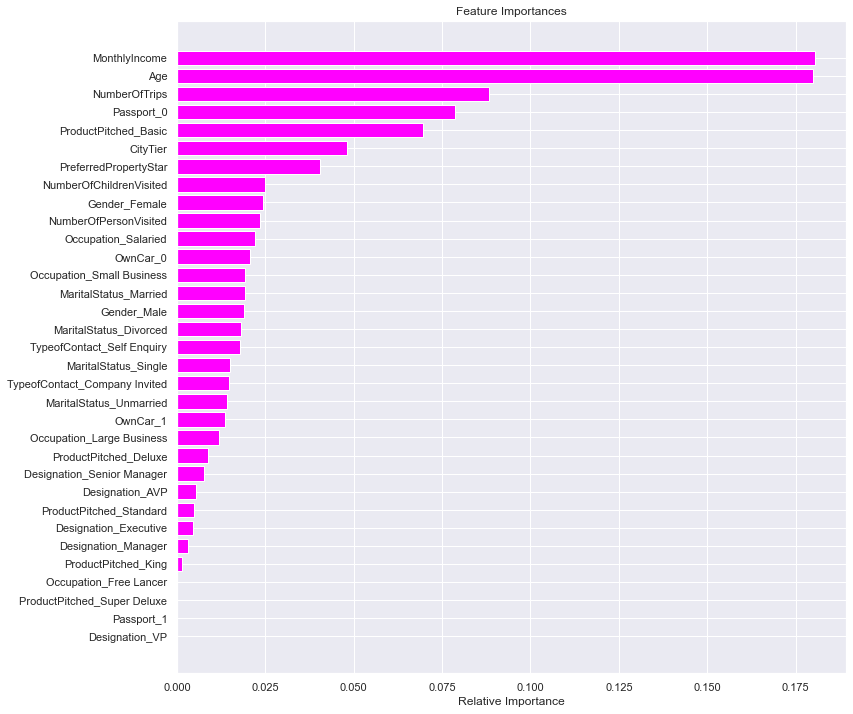

In [57]:
feature_names = X_train.columns
importances = dtree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='magenta', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Model performance improvement - 9 pts
#### Bagging 

#### Comment on which metric is right for model performance evaluation and why?

I think precision is the right metric to use here because there isn't a huge cost to the company of inviting someone to our salespitch who does not buy.

#### Comment on model performance

In [58]:
# Since this was 2-3 models ago due to the vagaries of the ordering of the notebook, I will bring back the model performance measures now.
bagging_classifier_score = get_metrics_score(bagging_classifier)

Accuracy on training set :  0.9906460099386144
Accuracy on test set :  0.8875255623721882
Recall on training set :  0.9503205128205128
Recall on test set :  0.5337837837837838
Precision on training set :  0.9983164983164983
Precision on test set :  0.8540540540540541


There's a 10% drop in accuracy, a 42% drop in recall, and a 15% drop in precision when we move from train to test.

#### Can model performance be improved? check and comment

In [59]:
print("I'm sure it can, but I've run out of time to tune.")

I'm sure it can, but I've run out of time to tune.


### Model building - Boosting - 6 pts
#### Build Adaboost

In [60]:
ab_classifier=AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [61]:
ab_classifier_score=get_metrics_score(ab_classifier)

Accuracy on training set :  0.8468284127448115
Accuracy on test set :  0.8295841854124063
Recall on training set :  0.27724358974358976
Recall on test set :  0.2533783783783784
Precision on training set :  0.7032520325203252
Precision on test set :  0.7211538461538461


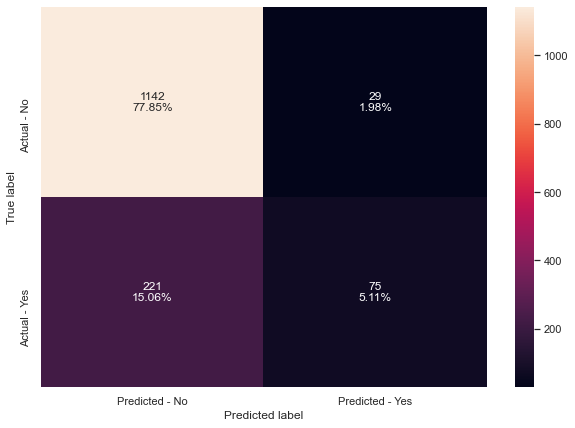

In [62]:
make_confusion_matrix(ab_classifier, y_test)

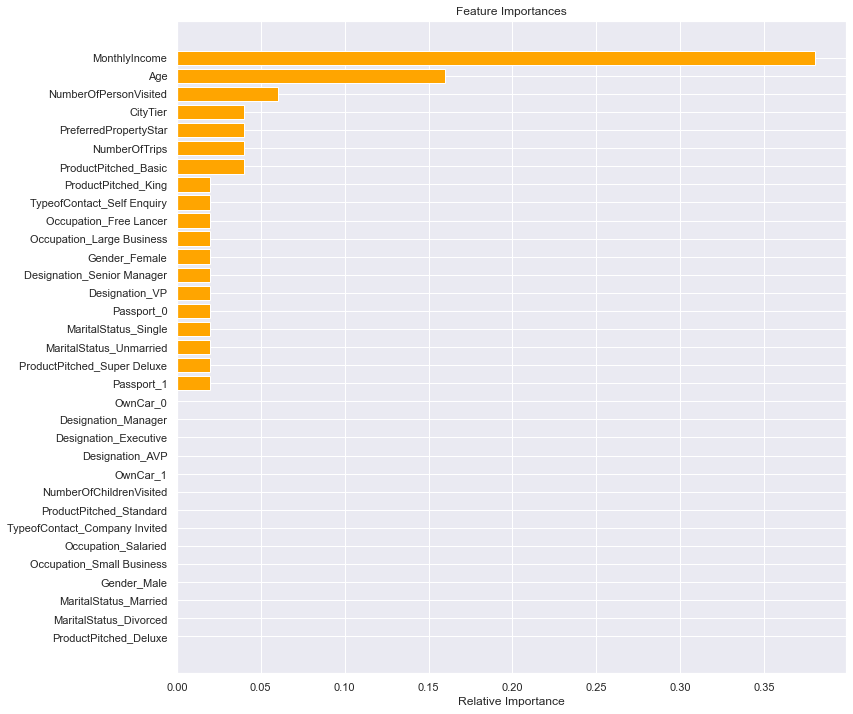

In [63]:
feature_names = X_train.columns
importances = ab_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='orange', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### gradient boost

In [64]:
gb_classifier=GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [65]:
gb_classifier_score=get_metrics_score(gb_classifier)

Accuracy on training set :  0.8836597486115171
Accuracy on test set :  0.8500340831629175
Recall on training set :  0.4423076923076923
Recall on test set :  0.34797297297297297
Precision on training set :  0.8466257668711656
Precision on test set :  0.7923076923076923


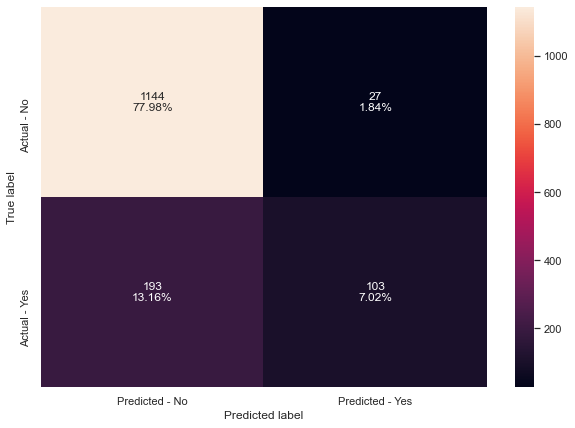

In [66]:
make_confusion_matrix(gb_classifier, y_test)

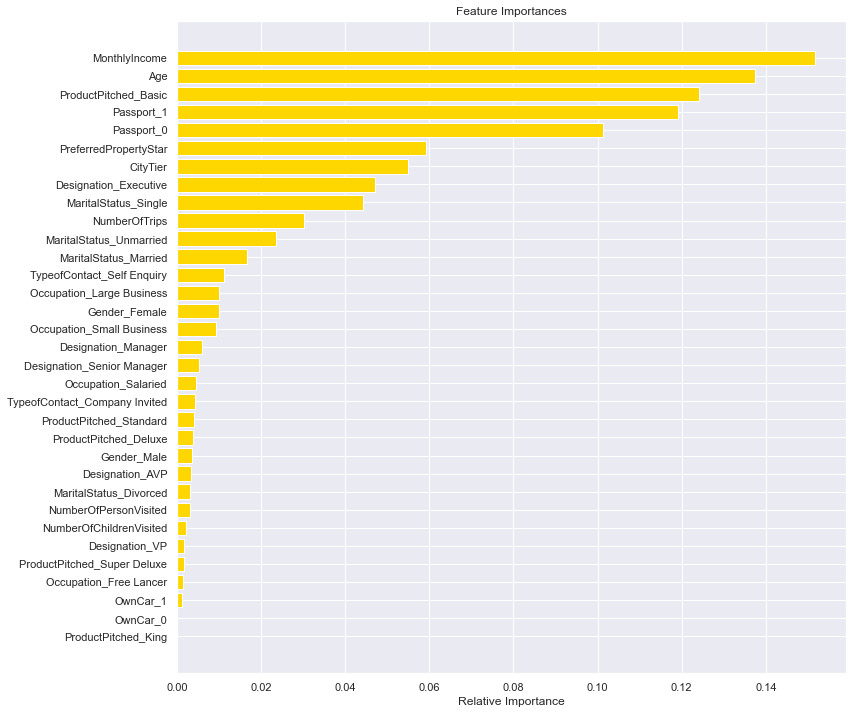

In [67]:
feature_names = X_train.columns
importances = gb_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='gold', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### xgboost

In [68]:
xgb_classifier=XGBClassifier(random_state=1, eval_metric = 'logloss')
xgb_classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [69]:
xgb_classifier_score=get_metrics_score(xgb_classifier)

Accuracy on training set :  0.9961999415375621
Accuracy on test set :  0.8950238582140423
Recall on training set :  0.9791666666666666
Recall on test set :  0.5878378378378378
Precision on training set :  1.0
Precision on test set :  0.8446601941747572


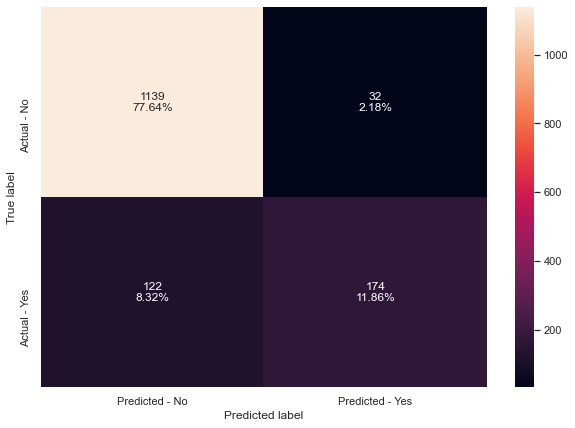

In [70]:
make_confusion_matrix(xgb_classifier, y_test)

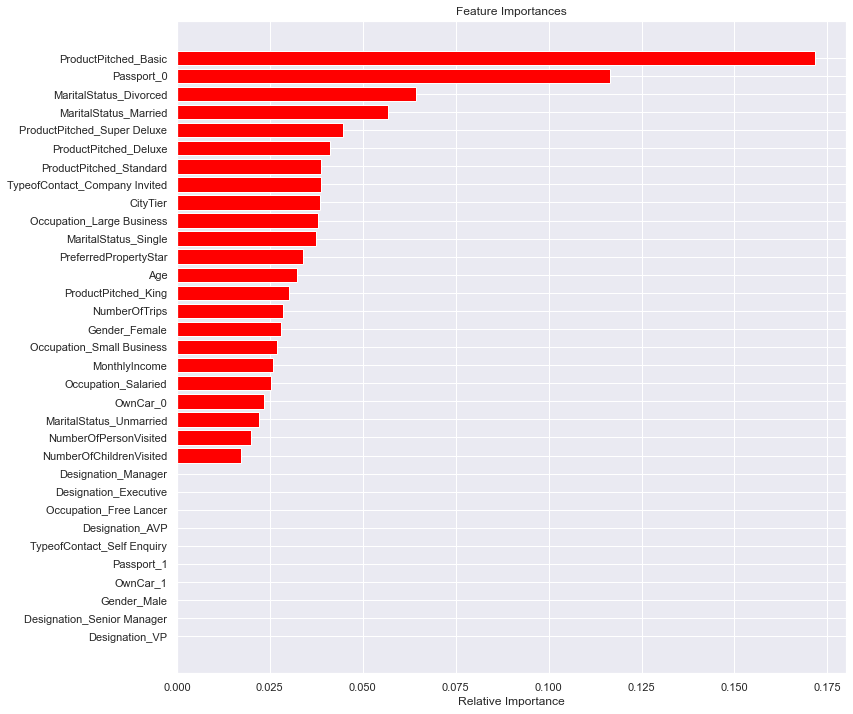

In [71]:
feature_names = X_train.columns
importances = xgb_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### stacking classifier

In [72]:
estimators=[('Decision Tree', dtree),('Random Forest', rf_classifier),
           ('Gradient Boosting', gb_classifier)]
final_estimator=XGBClassifier(random_state=1, eval_metric = 'logloss')

In [73]:
stacking_classifier=StackingClassifier(estimators=estimators, final_estimator=final_estimator,cv=5)
stacking_classifier.fit(X_train,y_train)

StackingClassifier(cv=5,
                   estimators=[('Decision Tree',
                                DecisionTreeClassifier(random_state=1)),
                               ('Random Forest',
                                RandomForestClassifier(random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(random_state=1))],
                   final_estimator=XGBClassifier(base_score=None, booster=None,
                                                 colsample_bylevel=None,
                                                 colsample_bynode=None,
                                                 colsample_bytree=None,
                                                 eval_metric...
                                                 importance_type='gain',
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                  

In [74]:
stacking_classifier_score=get_metrics_score(stacking_classifier)

Accuracy on training set :  0.997953814674072
Accuracy on test set :  0.8902522154055896
Recall on training set :  0.9935897435897436
Recall on test set :  0.6418918918918919
Precision on training set :  0.9951845906902087
Precision on test set :  0.7755102040816326


### Model performance improvement - Boosting - 9 pts
#### Comment on which metric is right for model performance evaluation and why?

I think that precision is the best metric for model performance in this case.  The cost of a false positive is higher than the cost of a false negative.  If we invite someone to our sales pitch and if that person doesn't buy, then we haven't lost too much.  However, if we don't invite that person to the table, then we can't get that sale at all.

#### Comment on model performance

There is a dropoff in all three printed performance metrics between the test and train.  This model is overfitting.  Accuracy dropped ~10%, recall 35%, and precision 22%.

#### Can model performance be improved? check and comment

In [75]:
print("It probably could, but I have run out of time.")

It probably could, but I have run out of time.


### Model performance evaluation - 4 pts
#### Evaluate the model on different performance metrics and comment on the performance and scope of improvement

In [76]:
# defining list of models
models = [bagging_classifier, rf_classifier, dtree, ab_classifier, gb_classifier, xgb_classifier, stacking_classifier]

# defining empty lists to add train and test results
train_acc = []
test_acc = []
train_recall = []
test_recall = []
train_precision = []
test_precision = []

# looping through all the models to get the rmse and r2 scores
for model in models:
    # accuracy score
    j = get_metrics_score(model,False)
    train_acc.append(j[0])
    test_acc.append(j[1])
    train_recall.append(j[2])
    test_recall.append(j[3])
    train_precision.append(j[4])
    test_precision.append(j[5])

In [77]:
comparison_frame = pd.DataFrame({'Model':['Bagged Classifier','Random Forest Classifier','Decision Tree',
                                          'AdaBoost Classifier', 'Gradient Boosting Classifier',
                                          'XGBoost Classifier',  'Stacking Classifier'], 
                                          'Train Accuracy' : train_acc, 'Test Accuracy' : test_acc,
                                          'Train Recall' : train_recall,'Test Recall' : test_recall,
                                          'Train Precision' : train_precision, 'Test Precision' : test_precision}) 
comparison_frame.sort_values(by='Test Precision', ascending = False).style.hide_index()

Model,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train Precision,Test Precision
Random Forest Classifier,1.000000,0.882754,1.000000,0.479730,1.000000,0.887500
Bagged Classifier,0.990646,0.887526,0.950321,0.533784,0.998316,0.854054
XGBoost Classifier,0.996200,0.895024,0.979167,0.587838,1.000000,0.844660
Gradient Boosting Classifier,0.883660,0.850034,0.442308,0.347973,0.846626,0.792308
Stacking Classifier,0.997954,0.890252,0.993590,0.641892,0.995185,0.775510
AdaBoost Classifier,0.846828,0.829584,0.277244,0.253378,0.703252,0.721154
Decision Tree,1.000000,0.871847,1.000000,0.658784,1.000000,0.691489


It looks like the Random Forest Classifier performed the best when test precision was what we decided to maximize.

### Actionable Insights & Recommendations - 5 pts
#### Conclude with the key takeaways for the business

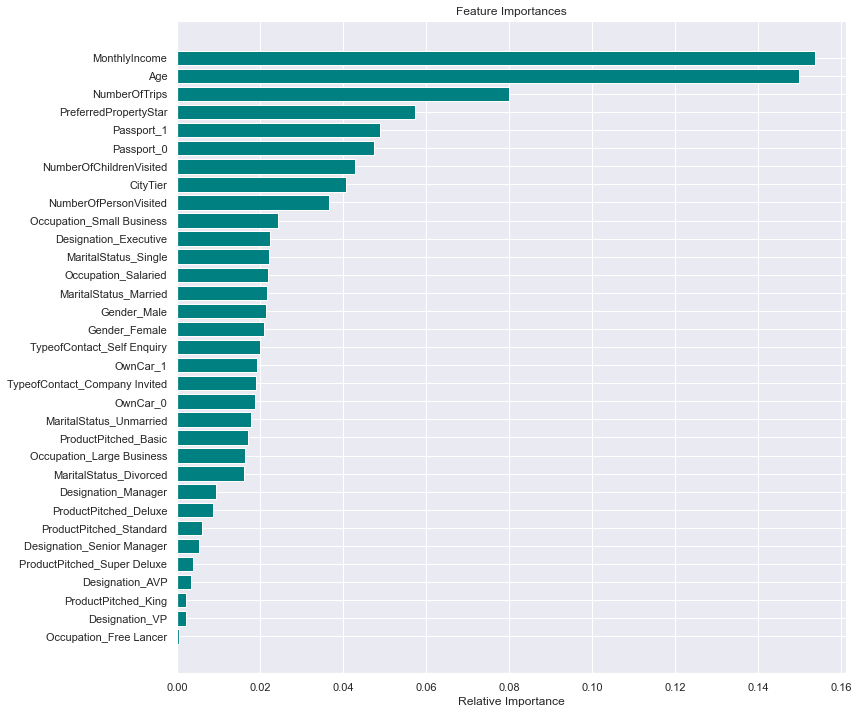

In [78]:
feature_names = X_train.columns
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='teal', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Monthly Income and age appear to be the most important features in our model, so we should focus on customers with the right income and age profiles for our new product.

#### What would your advice be to grow the business?

Figure out which product this new offering is closest to so that we know which customer profile to approach first.  We can then give the most weight to the income and age to tell who we need to let into the room.

### Notebook - Overall - 4pts
#### Structure and flow

In [79]:
print("I used the text from the assignment rubric to structure the order of the steps.")

I used the text from the assignment rubric to structure the order of the steps.


#### Well commented code

In [80]:
print("I think I did a good job with comments and markdown.\nI ran out of time for model-tuning, so, hopefully,\nI can at least get these 4 points for organization to\nmake up for the 8-10 I'll miss for not grid-searching.")

I think I did a good job with comments and markdown.
I ran out of time for model-tuning, so, hopefully,
I can at least get these 4 points for organization to
make up for the 8-10 I'll miss for not grid-searching.


#### **Scoring guide (Rubric) - Travel Package Purchase Prediction**

| <u> Criteria </u>  | <u> Points </u> |
|-----------| ---------|
|  <center><b> Perform an Exploratory Data Analysis on the data </b></b></center>|  |
| Univariate analysis - Bivariate analysis - Use appropriate visualizations to identify the patterns and insights - Come up with a customer profile (characteristics of a customer) of the different packages - Any other exploratory deep dive | 8 |
| <center><b> Illustrate the insights based on EDA </center>| |
| Key meaningful observations on individual variables and the relationship between variables | 4 |
| <center><b> Data Pre-processing </b></center>| |
| Prepare the data for analysis - Missing value Treatment, Outlier Detection (treat, if needed- why or why not ), Feature Engineering, Prepare data for modeling | 7 |
| <center><b> Model building - Bagging </b></center>| |
| Build bagging classifier, random forest, and decision tree. | 4 |
| <center><b> Model performance improvement - Bagging </b></center>| |
| Comment on which metric is right for model performance evaluation and why? - Comment on model performance - Can model performance be improved? check and comment | 9 |
| <center><b> Model building - Boosting </b></center>| |
| Build Adaboost, gradient boost, xgboost, and stacking classifier | 6 |
| <center><b> Model performance improvement - Boosting </b></center>| |
| Comment on which metric is right for model performance evaluation and why? - Comment on model performance - Can model performance be improved? check and comment | 9 |
| <center><b> Model performance evaluation </b></center>| |
| Evaluate the model on different performance metrics and comment on the performance and scope of improvement | 4 |
| <center><b> Actionable Insights & Recommendations </b></center>| |
| Conclude with the key takeaways for the business - What would your advice be to grow the business? | 5 |
| <center><b> Notebook - Overall </b></center>| |
| Structure and flow - Well commented code | 4 |
|Total Points | 60 |